In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv("KNN.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])

In [19]:
X = data[["Age","EstimatedSalary","Gender"]]  
Y = data["Purchased"] 

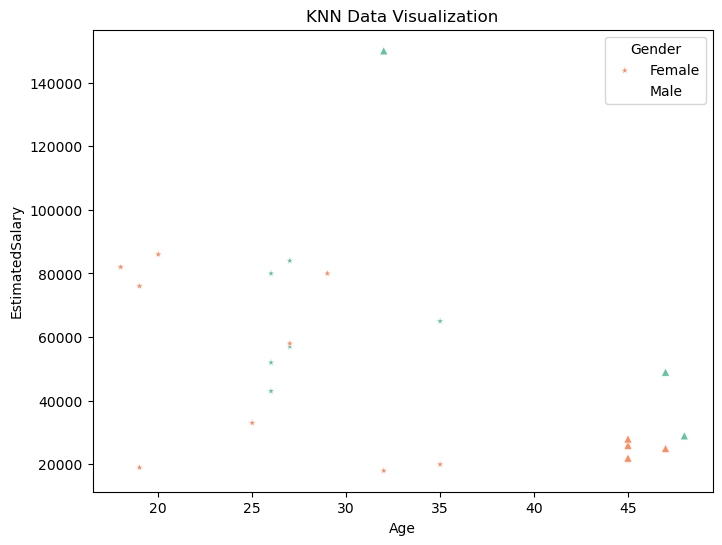

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="EstimatedSalary", hue="Gender", style="Purchased", palette="Set2", markers=["*", "^"])
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("KNN Data Visualization")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

In [21]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  


In [22]:
st_x= StandardScaler()    

In [23]:
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

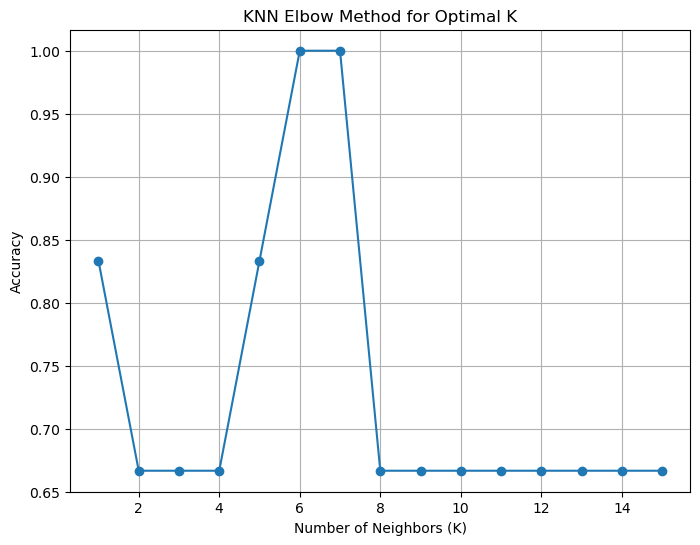

In [30]:
# Initialize variables to store k values and corresponding accuracies
k_values = list(range(1, 16))
accuracies = []

# Calculate accuracy for different k values
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [31]:
classifier= KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  


KNeighborsClassifier(n_neighbors=6)

In [32]:
y_pred= classifier.predict(x_test)  


In [33]:
cm= confusion_matrix(y_test, y_pred)


In [34]:
print(cm)

[[4 0]
 [0 2]]


<AxesSubplot:>

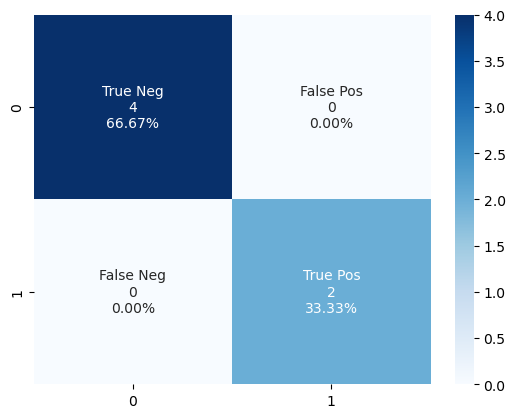

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')


In [36]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
